In [17]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.metrics import f1_score

def dice_score(y_true, y_pred, label):
    y_true_bin = (y_true == label).astype(np.uint8)
    y_pred_bin = (y_pred == label).astype(np.uint8)
    intersection = np.sum(y_true_bin * y_pred_bin)
    return (2. * intersection) / (np.sum(y_true_bin) + np.sum(y_pred_bin) + 1e-8)

def dice_whole_tumor(y_true, y_pred, new_data=False):
    if new_data:
        labels = [1, 2, 3]
    else:
        labels = [1, 2, 4]
    y_true_bin = np.isin(y_true, labels).astype(np.uint8)
    y_pred_bin = np.isin(y_pred, labels).astype(np.uint8)
    intersection = np.sum(y_true_bin * y_pred_bin)
    return (2. * intersection) / (np.sum(y_true_bin) + np.sum(y_pred_bin) + 1e-8)

def get_id_from_filename(name):
    return name.split("_")[1]

def evaluate(seg_dir, pred_dir, new_data=False):
    if new_data:
        labels = [1, 2, 3]
    else:
        labels = [1, 2, 4]
    results = {}

    for seg_name in os.listdir(seg_dir):
        if not seg_name.endswith(".nii.gz"):
            continue

        case_id = get_id_from_filename(seg_name)
        pred_name = f"{case_id}.nii.gz"

        seg_path = os.path.join(seg_dir, seg_name)
        pred_path = os.path.join(pred_dir, pred_name)

        if not os.path.exists(pred_path):
            print(f"Prediction not found for {case_id}")
            continue

        seg_img = nib.load(seg_path).get_fdata()
        pred_img = nib.load(pred_path).get_fdata()
        if new_data:
            pred_img = np.copy(pred_img)
            pred_img[pred_img == 4] = 3

        case_result = {}
        for l in labels:
            dice = dice_score(seg_img, pred_img, l)
            case_result[f"Dice_label_{l}"] = dice

        wt_dice = dice_whole_tumor(seg_img, pred_img)
        case_result["Dice_whole_tumor"] = wt_dice

        results[case_id] = case_result

    return results

In [13]:
seg_dir = "../brats_data/BraTS2021/segmentation"
pred_dir = "../brats_data/BraTS2021/output"
results = evaluate(seg_dir, pred_dir)

for case, scores in results.items():
    print(f"{case}:")
    for label, dice in scores.items():
        print(f"  {label}: {dice:.4f}")

00011:
  Dice_label_1: 0.2400
  Dice_label_2: 0.9550
  Dice_label_4: 0.9437
  Dice_whole_tumor: 0.9606
00019:
  Dice_label_1: 0.9473
  Dice_label_2: 0.9505
  Dice_label_4: 0.9352
  Dice_whole_tumor: 0.9564
00021:
  Dice_label_1: 0.3764
  Dice_label_2: 0.8637
  Dice_label_4: 0.8162
  Dice_whole_tumor: 0.8839
00046:
  Dice_label_1: 0.9577
  Dice_label_2: 0.9626
  Dice_label_4: 0.9643
  Dice_whole_tumor: 0.9775
00064:
  Dice_label_1: 0.8229
  Dice_label_2: 0.8892
  Dice_label_4: 0.8729
  Dice_whole_tumor: 0.9601
00074:
  Dice_label_1: 0.9118
  Dice_label_2: 0.9569
  Dice_label_4: 0.9282
  Dice_whole_tumor: 0.9770
00078:
  Dice_label_1: 0.9745
  Dice_label_2: 0.9551
  Dice_label_4: 0.9627
  Dice_whole_tumor: 0.9801
00098:
  Dice_label_1: 0.8204
  Dice_label_2: 0.7810
  Dice_label_4: 0.8180
  Dice_whole_tumor: 0.9005
00104:
  Dice_label_1: 0.7565
  Dice_label_2: 0.9229
  Dice_label_4: 0.9528
  Dice_whole_tumor: 0.9689
00105:
  Dice_label_1: 0.7873
  Dice_label_2: 0.9086
  Dice_label_4: 0.88

In [15]:
seg_dir = "../brats_data/BraTS2024-Post/segmentation"
pred_dir = "../brats_data/BraTS2024-Post/output"
results = evaluate(seg_dir, pred_dir, new_data=True)

for case, scores in results.items():
    print(f"{case}:")
    for label, dice in scores.items():
        print(f"  {label}: {dice:.4f}")

00008:
  Dice_label_1: 0.0000
  Dice_label_2: 0.6343
  Dice_label_3: 0.0000
  Dice_whole_tumor: 0.5471
00033:
  Dice_label_1: 0.0000
  Dice_label_2: 0.2294
  Dice_label_3: 0.0000
  Dice_whole_tumor: 0.0426
00063:
  Dice_label_1: 0.7222
  Dice_label_2: 0.8428
  Dice_label_3: 0.7109
  Dice_whole_tumor: 0.8433
00472:
  Dice_label_1: 0.0000
  Dice_label_2: 0.0684
  Dice_label_3: 0.0000
  Dice_whole_tumor: 0.0275
00485:
  Dice_label_1: 0.9002
  Dice_label_2: 0.8269
  Dice_label_3: 0.8767
  Dice_whole_tumor: 0.7700
00511:
  Dice_label_1: 0.0000
  Dice_label_2: 0.0000
  Dice_label_3: 0.0000
  Dice_whole_tumor: 0.0000
00512:
  Dice_label_1: 0.0000
  Dice_label_2: 0.7139
  Dice_label_3: 0.0000
  Dice_whole_tumor: 0.5720
00518:
  Dice_label_1: 0.0000
  Dice_label_2: 0.8521
  Dice_label_3: 0.7670
  Dice_whole_tumor: 0.6026
00528:
  Dice_label_1: 0.8296
  Dice_label_2: 0.8619
  Dice_label_3: 0.9239
  Dice_whole_tumor: 0.7473
00533:
  Dice_label_1: 0.2030
  Dice_label_2: 0.6316
  Dice_label_3: 0.67

In [31]:
def plot_segmentation_slice(seg_path, title=None):
    import nibabel as nib
    import numpy as np
    import matplotlib.pyplot as plt

    # Load volume
    seg = nib.load(seg_path).get_fdata()
    
    # Find slice with largest tumor area
    sum_per_slice = [np.sum(seg[:, :, i] > 0) for i in range(seg.shape[2])]
    if max(sum_per_slice) == 0:
        print("No tumor found in the volume.")
        return
    best_slice_idx = np.argmax(sum_per_slice)
    seg_slice = seg[:, :, best_slice_idx]

    # Prepare RGB overlay
    rgb = np.zeros(seg_slice.shape + (3,), dtype=np.uint8)

    label_map = {
        1: [255, 0, 0],    # Tumor core – red
        2: [0, 255, 0],    # Edema – green
        4: [0, 0, 255],    # Enhancing tumor – blue
    }

    for label, color in label_map.items():
        rgb[seg_slice == label] = color

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.title(title or f"Segmentation Slice (slice {best_slice_idx})")
    plt.axis('off')
    plt.show()


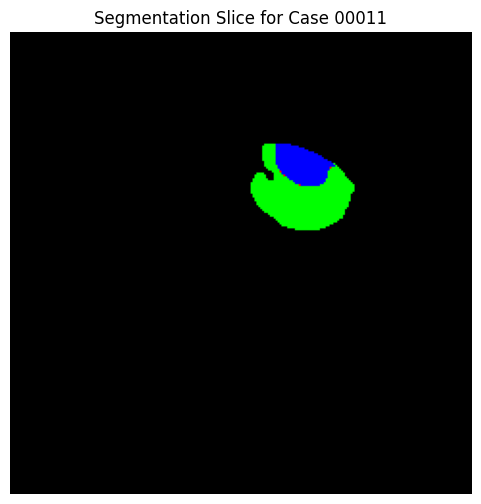

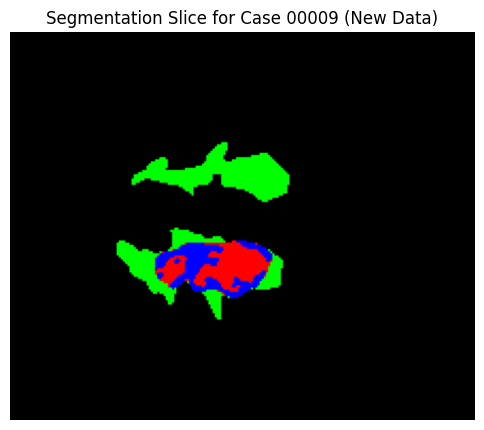

In [30]:
plot_segmentation_slice(seg_path=r'../brats_data/BraTS2021\output\00011.nii.gz', title="Segmentation Slice for Case 00011")
plot_segmentation_slice(seg_path=r'../brats_data/BraTS2024-Post\output\02770.nii.gz', title="Segmentation Slice for Case 00009 (New Data)")